In [1]:
# Run this 2 lines of code if you want to run on google colab and change runtime to GPU as it will take time to load a complex image
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 18.8 MB/s eta 0:00:00


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

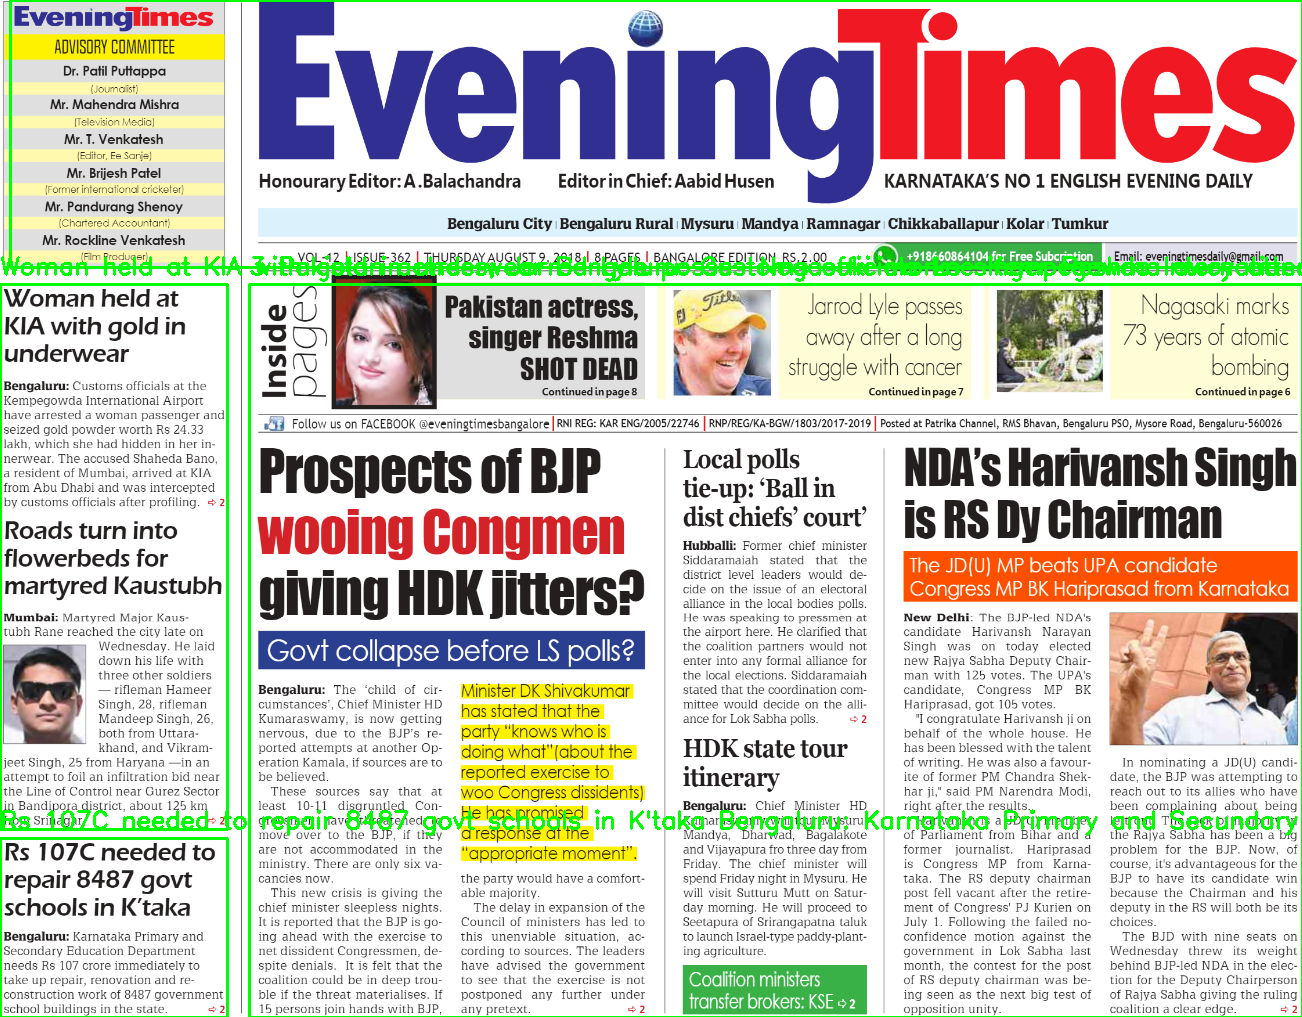

-1

In [2]:
# !pip install easyocr
import easyocr
import cv2
# from google.colab.patches import cv2_imshow

#For the first time it downloads the models for the languages chosen below.
#Not all languages are compatible with each other so you cannot put
#multiple languages below
#reader = easyocr.Reader(['hi', 'te', 'en'])  #Hindi, telugu, and English
#The above gives error that Telugu is only compatible with English.

#So let us just use Hindi and English
#To use GPU you need to have CUDA configured for the pytorch library.
reader = easyocr.Reader(['en'], gpu=True)  #Hindi, telugu, and English

img = cv2.imread('/content/drive/MyDrive/OCR/EveningTimes.png')


results = reader.readtext(img, detail=1, paragraph=True) #Set detail to 0 for simple text output
#Paragraph=True will combine all results making it easy to capture it in a dataframe.


#To display the text on the original image or show bounding boxes
#we need the coordinates for the text. So make sure the detail=1 above, readtext.
# display the OCR'd text and associated probability
for (bbox, text) in results:

    #Define bounding boxes
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    #Remove non-ASCII characters to display clean text on the image (using opencv)
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()

    #Put rectangles and text on the image
    cv2.rectangle(img, tl, br, (0, 255, 0), 2)
    cv2.putText(img, text, (tl[0], tl[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
# show the output image
cv2_imshow(img)
cv2.waitKey(0)

In [3]:
# Path to the image
image_path = '/content/drive/MyDrive/Arabic Text Newspaper/ALL Images/EveningTimes.png'

# Check if the image file exists
try:
    with open(image_path, 'rb') as image_file:
        image_data = image_file.read()
except FileNotFoundError:
    print(f"Error: The image file '{image_path}' was not found.")
    exit()

# Read the image using OpenCV
img = cv2.imread(image_path)

# Check if the image was loaded successfully
if img is None:
    print("Error: Failed to load the image.")
    exit()

try:
    # Perform OCR on the image
    results = reader.readtext(img, detail=1, paragraph=True)

    # Create a variable to hold the paragraphs
    paragraphs = []

    for (_, text) in results:
        # Remove non-ASCII characters from the text
        text = "".join([c if ord(c) < 128 else "" for c in text]).strip()

        # Append the text to the paragraphs list
        paragraphs.append(text)

    # Join the paragraphs into a single string
    full_text = '\n'.join(paragraphs)

    # Print the full text
    print(full_text)

    # Save the full text to a text file
    with open('/content/drive/MyDrive/OCR/output/output.txt', 'w') as txt_file:
        txt_file.write(full_text)

except Exception as e:
    print(f"Error: {str(e)}")

# Close any open windows and release resources
cv2.destroyAllWindows()


Eveningimes AVISORV COMMITTEE Dr. Patil Puttappa (olmaist) Mr: Mahendra Mishra Eveningiies Mr; T, Venkatesh IEditor; E= San=l Mr: Brijesh Patel Honourary Editor: A.Balachandra Editorin Chief: Aabic KARNATAKA'S NO 1 ENGLISH EVENING DAILY WFommnennteinolc  cricketei Mr. Pandurang Shenoy ICharerec Accountan Bengaluru City Bengaluru Rural Mysuru Mandya Ramnagar Chikkaballapur  Kolar Tumkur Mr: Rockline Venkatesh Producer VOL-12 ISSUE-362 THURSDAY AUGUST 9 2018 8 PAGES BANGALORE EDITION Rs.2.00 +918660864104 for Free Subcription Email: eveningtimesdaily@gmail,com
Woman held at KIA with gold in underwear Bengaluru: Customs officials Lne Kempegowda International Airpont have arrested Wonam Dassenoer and seized gold powder worth Rs 24.33 lakm, Wcn she had midden her nersieant me acrubed Shaheda Bano; from Abu Dhabi and was intercepted bv customs ofticials atter protiling Roads turn into flowerbeds for martyred Kaustubh Mumbai: Mantyred Major Kaus Iubh Rane reached the cirv late on Wednesday. H

In [4]:
# !pip install pytesseract
# !pip install openpyxl
# !sudo apt install tesseract-ocr
import pytesseract
import re
from PIL import Image
import openpyxl
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'
# Load the image
image_path = '/content/drive/MyDrive/Arabic Text Newspaper/ALL Images/EveningTimes.png'
img = Image.open(image_path)

# Perform OCR using Tesseract
text = pytesseract.image_to_string(img)

# Perform your layout analysis to split the text into sections

# For example, let's assume we have two columns, and we split the text accordingly
columns = text.split('\n\n')  # Adjust the split logic based on your layout analysis

# Store the text of each section in a dictionary
sections = {}

# Create a new Excel workbook
wb = openpyxl.Workbook()
ws = wb.active

for i, column_text in enumerate(columns):
    section_name = f'Section {i + 1}'
    sections[section_name] = column_text

# Print and store the sections as needed
for section_name, section_text in sections.items():
    print(f"Section: {section_name}")
    print(section_text)
# Store each section in a separate cell in the Excel worksheet
for i, column_text in enumerate(columns):
    section_name = f'Section {i + 1}'

    # Clean the text by removing illegal characters
    cleaned_text = re.sub(r'[^\x20-\x7E]+', '', column_text)  # Remove non-printable characters

    # Write the section text to the corresponding cell
    ws[f'A{i + 1}'] = section_name
    ws[f'B{i + 1}'] = cleaned_text

    # Store the section_text in a file or data structure of your choice
    # Example: Save each section to a separate text file
    with open(f'section_{i + 1}.txt', 'w') as section_file:
       section_file.write(section_text)

# # Save the Excel workbook to a file
excel_file_path = '/content/drive/MyDrive/OCR/output/output.xlsx'  # Replace with your desired file path
wb.save(excel_file_path)

print(f"Sections have been saved to {excel_file_path}")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,471 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc